<a href="https://colab.research.google.com/github/filipecarbonera/bootcamp_data_science_modulo_3/blob/main/Aulas/Aula_02_M%C3%B3dulo_03_Bootcamp_Data_Science.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Pré-Aula

Definições feitas nas aulas anteriores que são necessárias para a continuidade desta aula.

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
url = 'https://github.com/alura-cursos/Prophet_covid/raw/main/dados_covid_sp.zip'
dados = pd.read_csv(url, sep=';')
dados['datahora'] = pd.to_datetime(dados['datahora'], format='%Y-%m-%d')
dados_sp = dados.query('nome_munic == "São Paulo"')

# **Aula 2**

A partir de agora vamos começar a trabalhar com previsões de séries temporais.

E para isso vamos usar a biblioteca Facebook Prophet, criado pelo [Facebook Research](https://research.fb.com/category/data-science/).

[Quick Start](https://facebook.github.io/prophet/docs/quick_start.html) do Prophet.

In [21]:
# Retomando os dados originais que iremos utilizar.
dados_sp['datahora']

562      2020-02-25
1207     2020-02-26
1852     2020-02-27
2497     2020-02-28
3142     2020-02-29
            ...    
283072   2021-05-08
283717   2021-05-09
284362   2021-05-10
285007   2021-05-11
285652   2021-05-12
Name: datahora, Length: 443, dtype: datetime64[ns]

In [22]:
# Importando a biblioteca.
from fbprophet import Prophet

# Criando um dataframe nos moldes necessários para aplicar os recursos da biblioteca.
df = pd.DataFrame()
df['ds'] = dados_sp['datahora'][:400]
df['y'] = dados_sp['casos_novos'][:400]

# É necessário no dataframe uma coluna chamada 'ds' para os dados temporáis e uma coluna 'y' para a variável a ser estudada.
# Nesse caso vamos usar os dados da cidade de São Paulo e estudar o número de casos novos.
# Importante pontuar também que está sendo utilizado os primeiros 400 dias para que possamos testar o modelo com os outros 43 dias restantes, ou seja, vamossubrimir do dataset os ultimos 43 dias de caso e depois testar o modelo criado para ver se o que o modelo vai prever para esse modelo realmente condiz com a realidade.

In [23]:
dados_sp.shape

(443, 26)

In [24]:
# Visualizando o dataset resultante.
df.head()

,ds,y
562,2020-02-25,0
1207,2020-02-26,0
1852,2020-02-27,0
2497,2020-02-28,1
3142,2020-02-29,0


In [25]:
df.tail()

,ds,y
255337,2021-03-26,4241
255982,2021-03-27,3709
256627,2021-03-28,2010
257272,2021-03-29,1242
257917,2021-03-30,4748


"We fit the model by **instantiating a new Prophet object** (modelo = Prophet()). Any settings to the forecasting procedure are passed into the constructor. Then you **call its fit method** and **pass in the historical dataframe** (modelo.fit(df))."

---

"Ajustamos o modelo instanciando um novo objeto do Prophet. [ ... ] Então, chamamos o método fit e passamos a série histórica."



In [26]:
modelo = Prophet()

# Ajustando o modelo a nossos dados históricos.
modelo.fit(df)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


**Modelo é a linha azul no gráfico.**

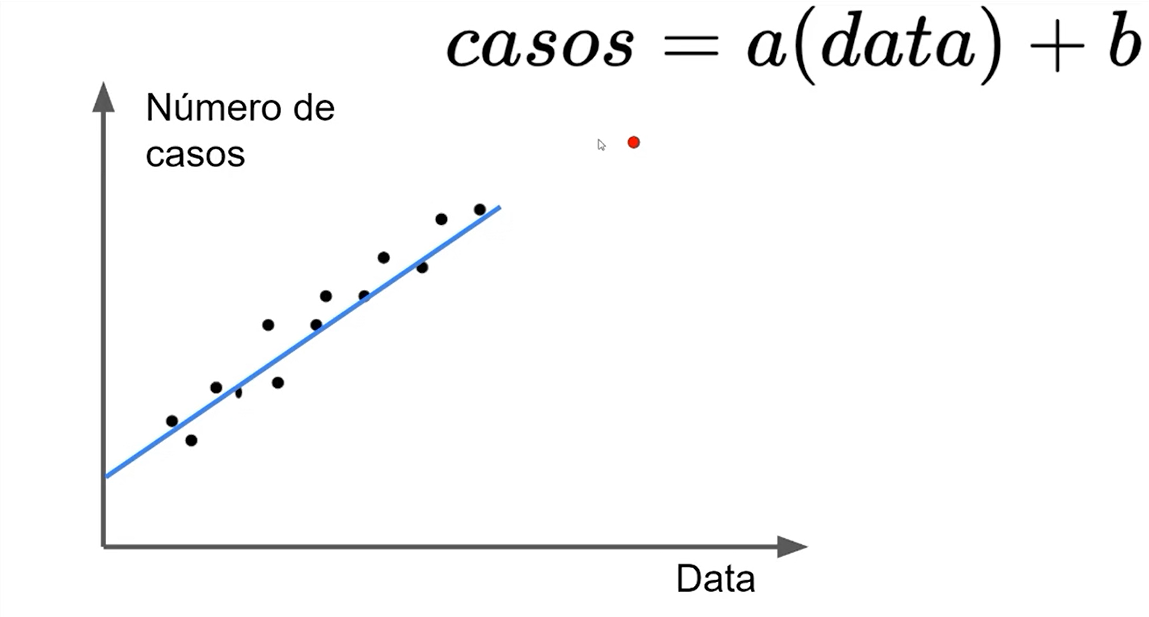

In [27]:
modelo

"You can get a suitable dataframe that extends into the future a specified number of days using the helper method Prophet.make_future_dataframe. By default it will also include the dates from the history, so we will see the model fit as well."

---

"Podemos obter um dataframe adequado que se estende até o futuro por um determinado número de dias usando o método auxiliar *Prophet.make_future_dataframe*. Por padrão, ele também incluirá os dados históricos e vai se adequar a eles."

In [28]:
# Aqui fazemos o que foi proposto no início. Esse novo dataframe tem tanto o período histórico (primeiros 400 dias) quanto o período a ser previsto (43 dias a mais).
# Lembrando que esses 43 dias a mais que serão previstos nos temos em 'dados_sp['datahora'], mas não estamos utilizando agora justamente para testar o modelo.
dataframefuturo = modelo.make_future_dataframe(periods=43)
dataframefuturo.head()

,ds
0,2020-02-25
1,2020-02-26
2,2020-02-27
3,2020-02-28
4,2020-02-29


In [29]:
dataframefuturo.tail()
# Lembrando que, até aqui, sem previsões.

,ds
438,2021-05-08
439,2021-05-09
440,2021-05-10
441,2021-05-11
442,2021-05-12


"The predict method will assign each row in future a predicted value which it names yhat. If you pass in historical dates, it will provide an in-sample fit. The forecast object here is a new dataframe that includes a column yhat with the forecast, as well as columns for components and uncertainty intervals."

---

"O método predict irá atribuir a cada coluna futura um valor previsto chamado yhat. Se passarmos os dados históricos o modelo irá fornecer uma amostra ajustada. O objeto de previsão aqui é um novo dataframe que inclui uma coluna yhat com a previsão, bem como colunas para componentes e intervalos de incerteza."

In [30]:
# Crio então a previsão através do modelo, passando todo o período (443 dias). Obs.: Irá prever de fato os 43 últimos.
previsao = modelo.predict(dataframefuturo)
previsao[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head()

,ds,yhat,yhat_lower,yhat_upper
0,2020-02-25,320.078004,-736.379664,1436.308759
1,2020-02-26,337.016324,-611.493676,1390.452463
2,2020-02-27,494.014021,-546.558193,1510.391902
3,2020-02-28,256.493471,-845.341528,1325.608408
4,2020-02-29,-7.395631,-1037.789253,1112.173530


In [31]:
previsao[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
438,2021-05-08,3256.552192,2150.636487,4322.023609
439,2021-05-09,2340.282141,1228.709980,3442.550963
440,2021-05-10,2177.135384,1150.892391,3292.881681
441,2021-05-11,3688.215105,2630.401033,4817.522236
442,2021-05-12,3698.401813,2664.556521,4778.616644


In [32]:
# Criamos então um dataframe com apenas os últimos 43 dias dos dados que temos no 'dados_sp['datahora']' para plotar no gráfico e verificar se o modelo preditivo se adequou aos dados.
df_teste = pd.DataFrame()
df_teste['ds'] =  dados_sp['datahora'][400:]
df_teste['y'] =  dados_sp['casos_novos'][400:]

In [33]:
df_teste

,ds,y
258562,2021-03-31,8348
259207,2021-04-01,8646
259852,2021-04-02,3743
260497,2021-04-03,1311
261142,2021-04-04,1359
261787,2021-04-05,1126
262432,2021-04-06,6740
263077,2021-04-07,5123
263722,2021-04-08,4671
264367,2021-04-09,4397


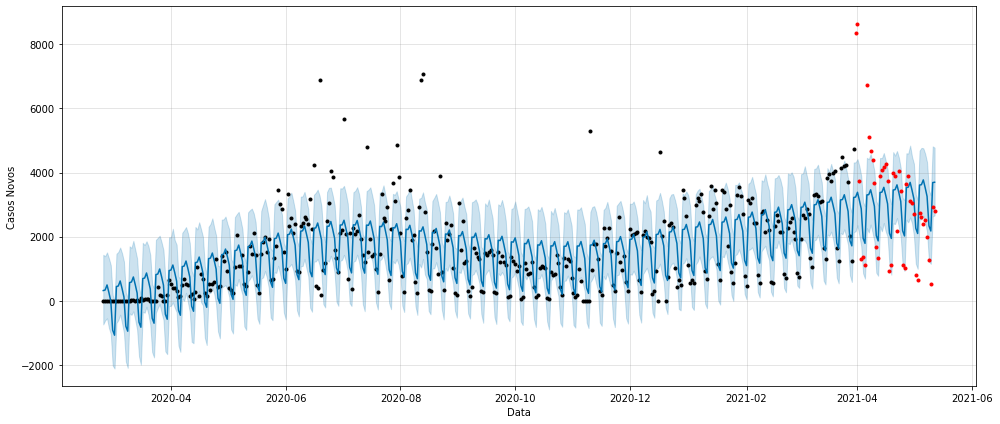

In [34]:
# Em azul, o modelo preditivo em todo o período, inclusive no futuro que foi anteriormente suprimido ([400:]).
modelo.plot(previsao, xlabel='Data', ylabel='Casos Novos', figsize=(14,6));
# Em vermelho os dados históricos (últimos 43 dias da série histórica) para verificar se o modelo cobriu os dados reais.
plt.plot(df_teste['ds'], df_teste['y'], '.r')

Assim, temos um gráfico que mostra os casos registrados em pontos pretos, a tendencia e previsão dos dados em azul e os dados reais de teste em vermelho.

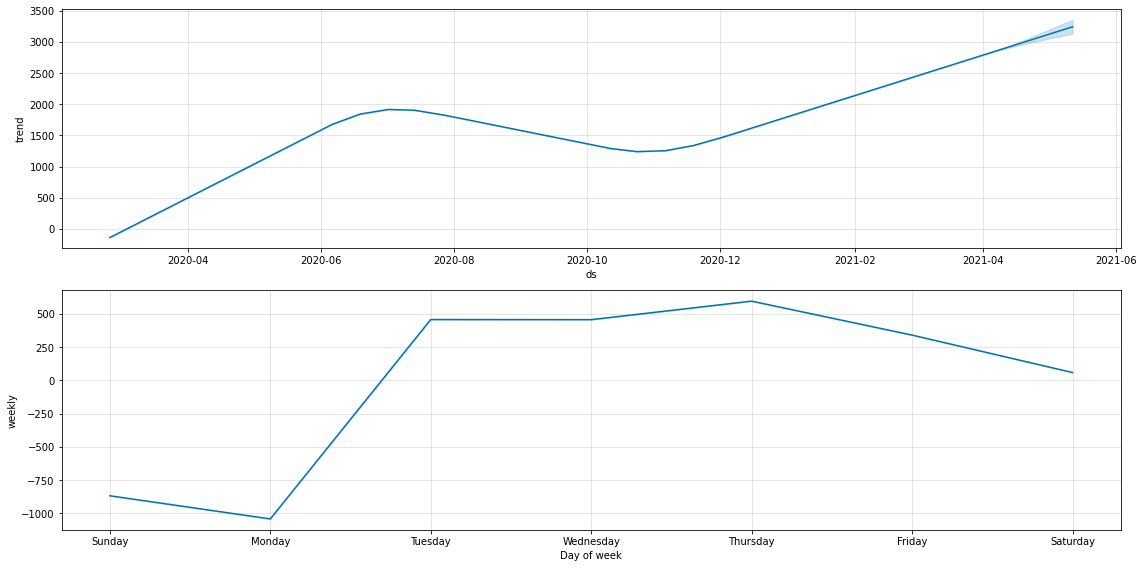

In [35]:
# Plotando as informações (componentes) que o Prophet está enxergando.
modelo.plot_components(previsao, figsize=(16,8));

O primeiro gráfico mostra a tendencia geral dos dados. Muito semelhante à linha azul plotada no gráfico anterior.

O segundo gráfico mostra a sazonalidade semanal dos dados.

O próximo passo, que será dados nas aulas seguintes, será melhorar o modelo para se adequar melhor aos dados reais.